<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto1_IMC_Marcelounb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
imcs = pd.read_csv('/content/imc.csv')
imcs.reset_index(drop=True, inplace=True)

In [147]:
imcs

,weight,height,imc
0,47.65,1.50,21.18
1,38.99,0.57,120.01
2,7.70,1.17,5.62
3,2.28,1.20,1.58
4,81.54,1.06,72.57
...,...,...,...
795,89.47,1.17,65.36
796,64.92,0.53,231.11
797,4.28,0.52,15.83
798,29.07,0.85,40.24


In [148]:
imcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
weight    800 non-null float64
height    800 non-null float64
imc       800 non-null float64
dtypes: float64(3)
memory usage: 18.9 KB


In [149]:
imcs.describe()

,weight,height,imc
count,800.00000,800.000000,800.000000
mean,48.40370,1.025087,61.836150
std,29.10054,0.286032,61.171234
min,0.02000,0.500000,0.020000
25%,22.42750,0.790000,19.220000
50%,48.27000,1.020000,43.345000
75%,73.65000,1.270000,79.625000
max,99.91000,1.500000,355.470000


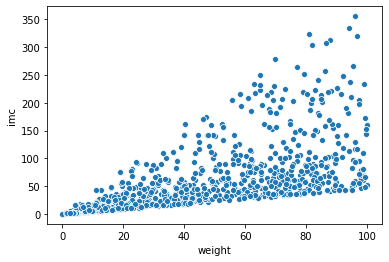

In [150]:
sns.scatterplot(imcs['weight'], imcs['imc'])

# Configuração da base de dados de treinamento

In [0]:
X = imcs.iloc[:, :-1].values

In [152]:
X

array([[47.65,  1.5 ],
       [38.99,  0.57],
       [ 7.7 ,  1.17],
       ...,
       [ 4.28,  0.52],
       [29.07,  0.85],
       [10.75,  0.8 ]])

In [0]:
y = imcs.iloc[:, -1:]

In [154]:
y

,imc
0,21.18
1,120.01
2,5.62
3,1.58
4,72.57
...,...
795,65.36
796,231.11
797,15.83
798,40.24


In [155]:
X.shape

(800, 2)

In [156]:
y.shape

(800, 1)

# Divisao da base de Treinamento e Teste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [158]:
X_train.shape

(640, 2)

In [159]:
X_test.shape

(160, 2)

# Construção e treinamento do modelo

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 120, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [161]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 120)               360       
_________________________________________________________________
dense_26 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_27 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_28 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 121       
Total params: 44,041
Trainable params: 44,041
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [163]:
epochs_hist = model.fit(X_train, y_train, epochs = 120, batch_size = 1, validation_split=0.2)

Train on 512 samples, validate on 128 samples
Epoch 1/120
512/512 [==============================] - 1s 3ms/sample - loss: 2692.9578 - val_loss: 4954.8194
Epoch 2/120
512/512 [==============================] - 1s 2ms/sample - loss: 2362.2809 - val_loss: 3111.9621
Epoch 3/120
512/512 [==============================] - 1s 2ms/sample - loss: 2273.7397 - val_loss: 3077.9317
Epoch 4/120
512/512 [==============================] - 1s 2ms/sample - loss: 2145.7143 - val_loss: 2975.2356
Epoch 5/120
512/512 [==============================] - 1s 2ms/sample - loss: 2046.7645 - val_loss: 3493.3022
Epoch 6/120
512/512 [==============================] - 1s 2ms/sample - loss: 1993.4737 - val_loss: 2310.1238
Epoch 7/120
512/512 [==============================] - 1s 2ms/sample - loss: 1687.6586 - val_loss: 1884.8710
Epoch 8/120
512/512 [==============================] - 1s 2ms/sample - loss: 1267.3433 - val_loss: 2461.2958
Epoch 9/120
512/512 [==============================] - 1s 2ms/sample - loss: 913.1

In [164]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

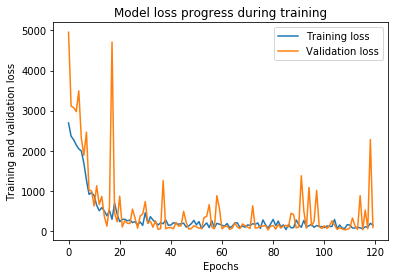

In [165]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [166]:
# Para fazer uma previsao:
X_test_previsao = np.array([[68, 1.71]])
y_predict_previsao = model.predict(X_test_previsao)
y_predict_previsao

array([[23.745945]], dtype=float32)

In [0]:
y_predict = model.predict(X_test)

In [168]:
y_predict

array([[ 12.788077 ],
       [ 21.417141 ],
       [ 12.9225645],
       [158.80028  ],
       [ 18.565674 ],
       [ 30.298515 ],
       [131.84042  ],
       [  8.411276 ],
       [ 65.78468  ],
       [ 48.414497 ],
       [ 74.73452  ],
       [221.26967  ],
       [ 44.21217  ],
       [227.20001  ],
       [ 11.916645 ],
       [  1.222759 ],
       [ 95.20283  ],
       [ 35.915047 ],
       [ 24.582745 ],
       [142.82352  ],
       [ 82.68752  ],
       [111.81419  ],
       [ 76.5169   ],
       [ 24.552643 ],
       [ 45.576904 ],
       [ 77.64045  ],
       [ 32.828667 ],
       [  9.788947 ],
       [ 87.04301  ],
       [286.10263  ],
       [ 34.997383 ],
       [ 63.092316 ],
       [ 88.93389  ],
       [ 13.948194 ],
       [ 29.886543 ],
       [  9.475385 ],
       [118.6894   ],
       [104.40054  ],
       [ 15.004563 ],
       [222.37866  ],
       [107.06942  ],
       [  4.3790703],
       [ 19.107124 ],
       [ 43.918312 ],
       [168.24878  ],
       [ 7

Text(0, 0.5, 'True values')

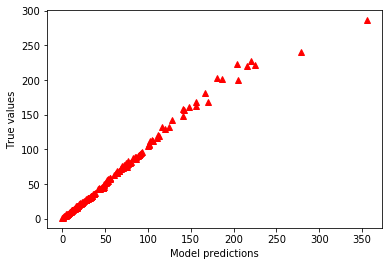

In [169]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [0]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [0]:
k = X_test.shape[1]
n = len(X_test)

In [0]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [173]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  3.641652539581061 
MSE:  63.366618711972095 
RMSE:  7.960315239484683 
R2:  0.9814967604805559 
ADJ R2:  0.9812610504229834
